## Importing Modules 

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
from scipy.stats import zscore

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Loading Dataset

In [6]:
cds = pd.read_csv('C:/Users/JIL/Documents/My Excel files/customer_segmentation.csv', encoding='cp1252')
cds.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


## Shape of Data

In [8]:
print('shape of data -', cds.shape)

print(f'There are total {cds.shape[0]} rows in data')
print(f'There are total {cds.shape[1]} features in data')

shape of data - (541909, 8)
There are total 541909 rows in data
There are total 8 features in data


## Understanding basic information in the data

In [9]:
cds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 1. Descriptive Statistics Analysis

In [10]:
cds.describe(include='number').round(2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [11]:
cds.describe(include="object")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


## Data Cleaning

1. Check for null values in data

In [13]:
cds.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
# Clean data by dropping null entries from data

cds.dropna(inplace=True)
cds.shape

(406829, 8)

In [23]:
# Reset index to give data clean index
cds.reset_index(drop=True, inplace=True)

In [24]:
#Change datatype for InvoiceDate column to date format

cds['InvoiceDate'] = pd.to_datetime(cds['InvoiceDate'])

In [25]:
cds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [26]:
# Remove outliers

z_scores = pd.DataFrame(zscore(cds[cds.select_dtypes(include='number').columns.tolist()]),
                       columns = cds.select_dtypes(include='number').columns.tolist())

In [27]:
outliers = z_scores[(np.abs(z_scores)>3).any(axis=1)]
outliers

,Quantity,UnitPrice,CustomerID
3102,-37.685254,-0.049491,0.321143
3645,7.285843,-0.041989,0.006600
3740,11.532041,-0.047327,0.855690
3741,5.580930,-0.034631,0.855690
3784,-0.044478,4.206005,-1.250404
...,...,...,...
405998,5.983033,-0.039536,1.553053
405999,4.776726,-0.039536,1.553053
406349,325.634086,-0.019916,0.675952
406350,-325.731083,-0.019916,0.675952


In [28]:
cds.drop(outliers.index, inplace=True)
cds.reset_index(inplace=True)

In [29]:
cds

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
406487,406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
406488,406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
406489,406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
406490,406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [30]:
#Quantity should be greater than zero

cds = cds[cds['Quantity']>=0]
cds.shape

(397679, 9)

## Exploratory Data Analysis (EDA)

In [31]:
cds.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Understanding Quantity and UnitPrice distribution

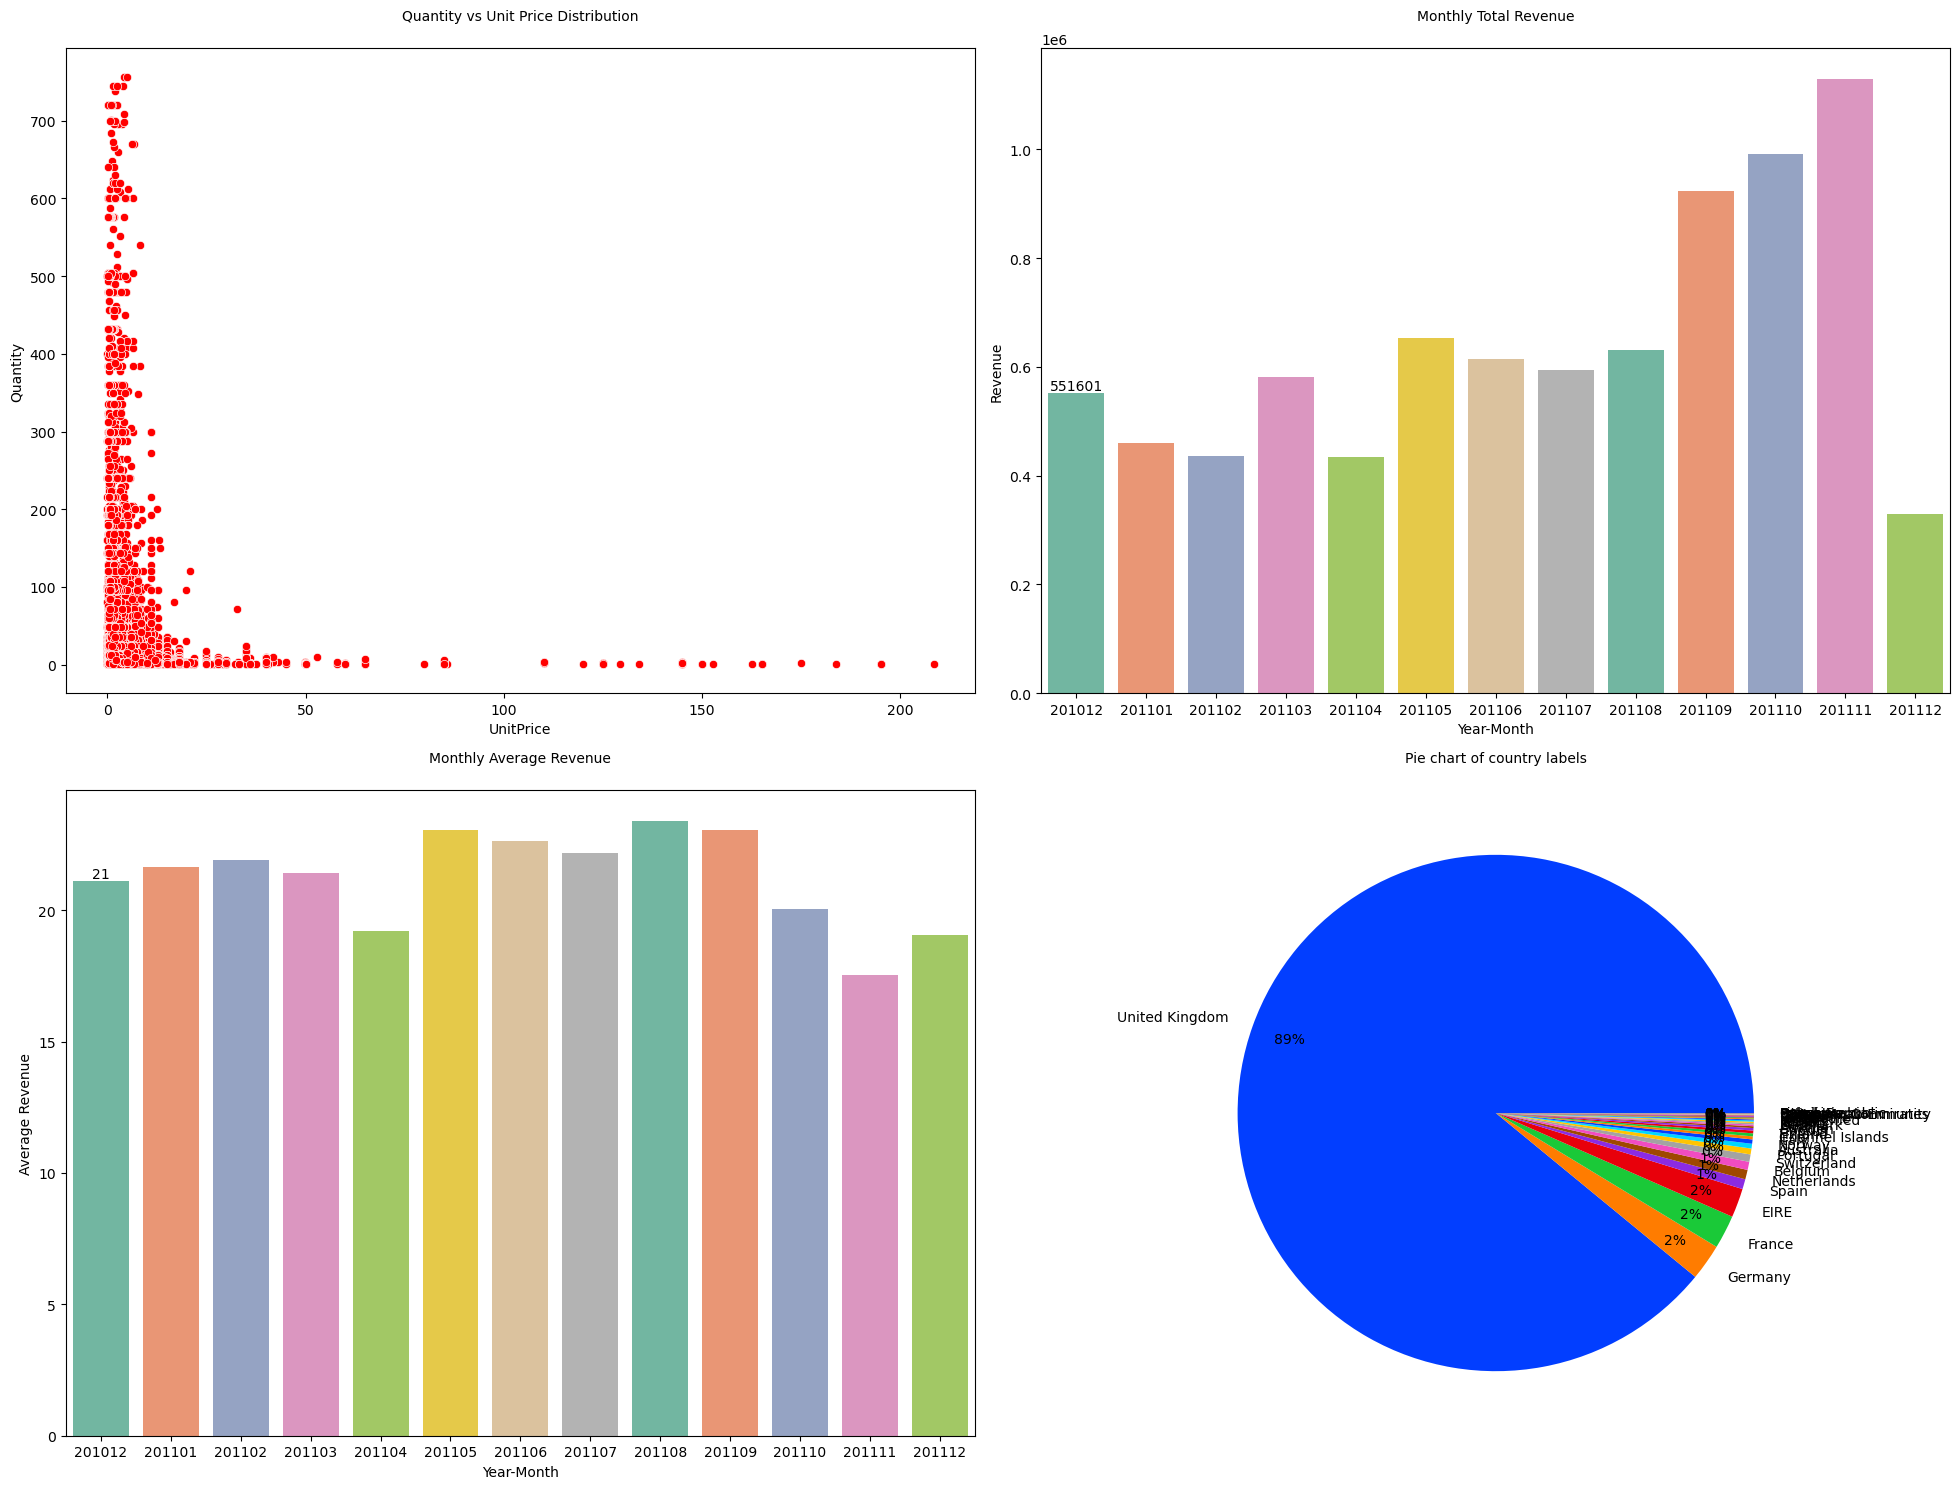

In [37]:
palette_color = sns.color_palette('bright')

plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
sns.scatterplot(data=cds, x='UnitPrice', y='Quantity', color='red')
plt.title('Quantity vs Unit Price Distribution', pad=20, fontsize=10, fontweight=20)

plt.subplot(2,2,2)
ax = sns.barplot(data=cds, y=cds['UnitPrice']*cds['Quantity'], x=cds['InvoiceDate'].map
                (lambda date: 100*date.year + date.month), palette='Set2', ci=None,
                estimator=np.sum)
plt.title('Monthly Total Revenue', pad=20, fontsize=10, fontweight=20)
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')

plt.subplot(2,2,3)
ax = sns.barplot(data=cds, y=cds['UnitPrice']*cds['Quantity'], x=cds['InvoiceDate'].map
                (lambda date: 100*date.year + date.month),
                palette='Set2', ci=None, estimator=np.mean)
plt.title('Monthly Average Revenue', pad=20, fontsize=10, fontweight=20)
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.xlabel('Year-Month')
plt.ylabel('Average Revenue')

plt.subplot(2,2,4)
churn_label_count = cds["Country"].value_counts()

plt.pie(churn_label_count, labels=churn_label_count.index, colors=palette_color, autopct
       ='%.0f%%', pctdistance=0.85)
plt.title("Pie chart of country labels", pad=20, fontsize=10, fontweight=20)

plt.tight_layout()
plt.show()

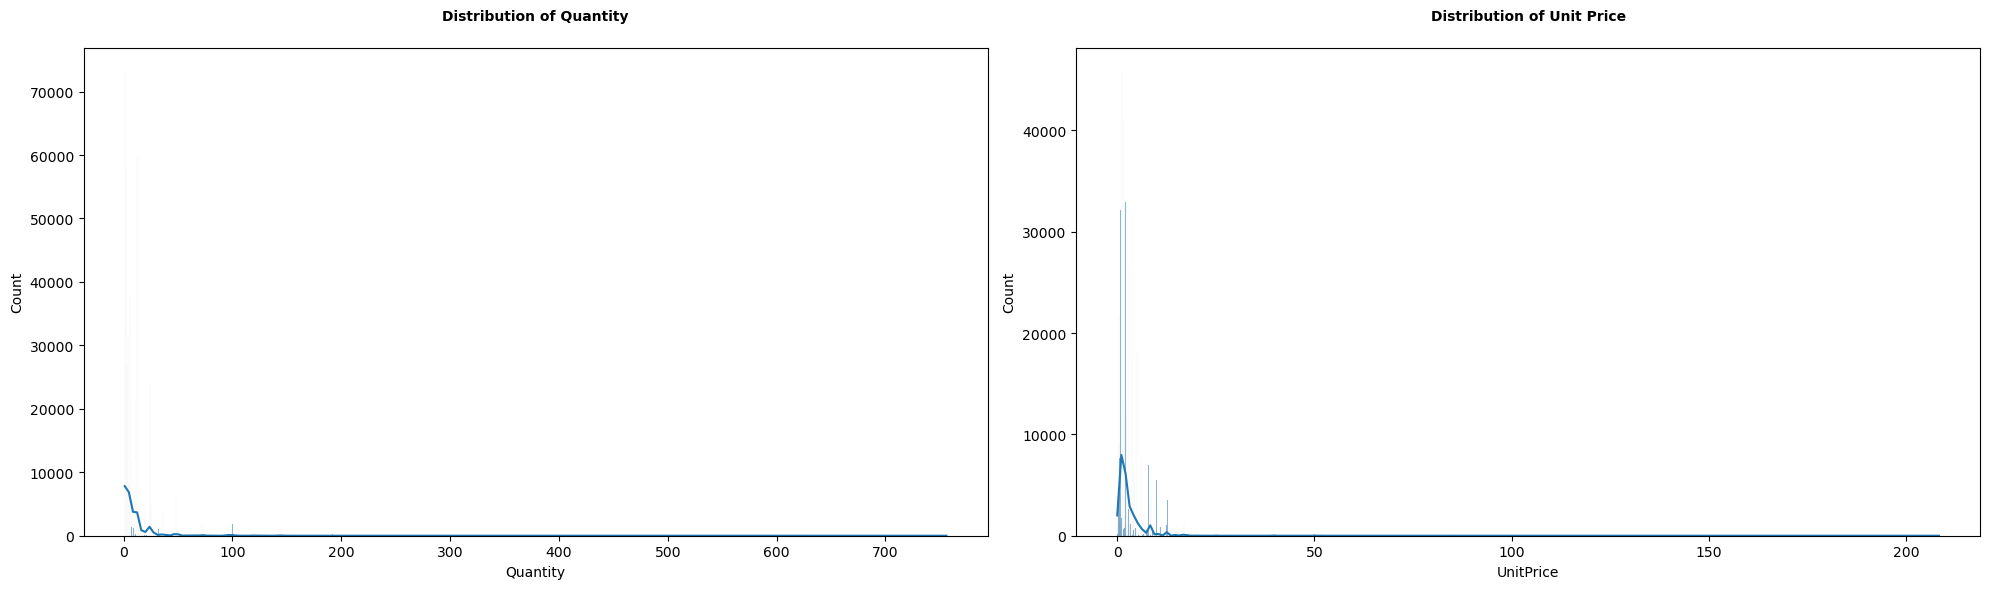

In [39]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.histplot(data=cds, x='Quantity', kde=True)
plt.title('Distribution of Quantity', pad=20, fontsize=10, fontweight='bold')

plt.subplot(1,2,2)
sns.histplot(data=cds, x='UnitPrice', kde=True)
plt.title('Distribution of Unit Price', pad=20, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Segmentation

In [50]:
cds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397679 entries, 0 to 406491
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        397679 non-null  int64         
 1   InvoiceNo    397679 non-null  object        
 2   StockCode    397679 non-null  object        
 3   Description  397679 non-null  object        
 4   Quantity     397679 non-null  int64         
 5   InvoiceDate  397679 non-null  datetime64[ns]
 6   UnitPrice    397679 non-null  float64       
 7   CustomerID   397679 non-null  float64       
 8   Country      397679 non-null  object        
 9   Index        397679 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 33.4+ MB


In [51]:
cds_users = pd.DataFrame(cds['CustomerID'].unique().tolist(), columns=['CustomerID'])
cds_users.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [52]:
cds_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4326 entries, 0 to 4325
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4326 non-null   float64
dtypes: float64(1)
memory usage: 33.9 KB


### Recency Score

In [53]:
cds_max_purchase = cds.groupby('CustomerID').agg({'InvoiceDate': 'max'}).reset_index()
cds_max_purchase.columns = ['CustomerID', 'MaxPurchaseDate']
cds_max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12347.0,2011-12-07 15:52:00
1,12348.0,2011-09-25 13:13:00
2,12349.0,2011-11-21 09:51:00
3,12350.0,2011-02-02 16:01:00
4,12352.0,2011-11-03 14:37:00


In [54]:
cds_max_purchase['Recency'] = (cds_max_purchase.MaxPurchaseDate.max() - 
                               cds_max_purchase['MaxPurchaseDate']).dt.days
cds_max_purchase.head()

,CustomerID,MaxPurchaseDate,Recency
0,12347.0,2011-12-07 15:52:00,1
1,12348.0,2011-09-25 13:13:00,74
2,12349.0,2011-11-21 09:51:00,18
3,12350.0,2011-02-02 16:01:00,309
4,12352.0,2011-11-03 14:37:00,35


In [55]:
cds_users = pd.merge(cds_users, cds_max_purchase[['CustomerID', 'Recency']], on='CustomerID')
cds_users.head()

,CustomerID,Recency
0,17850.0,371
1,13047.0,31
2,12583.0,2
3,13748.0,95
4,15100.0,333


#### Calculate Recency Score

In [107]:
# Create function that plots graph for Elbow method and Silhouette score

def cluster_determination(k_clusters, inertia_values, silhouette_scores):
    """
    This function plots graphs for clusters using the Elbow method and Silhouette score.
    """
    plt.figure(figsize=(20, 5))

    plt.subplot(1,2,1)
    plt.plot(k_clusters, inertia_values, marker='o', color='red')
    plt.title('Inertia vs Number of Clusters', pad=10, fontsize=12, fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

    plt.subplot(1, 2, 2)
    plt.plot(k_clusters, silhouette_scores, marker='o', color='blue')
    plt.title('Silhouette Score vs Number of Clusters', pad=10, fontsize=12, fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()
    

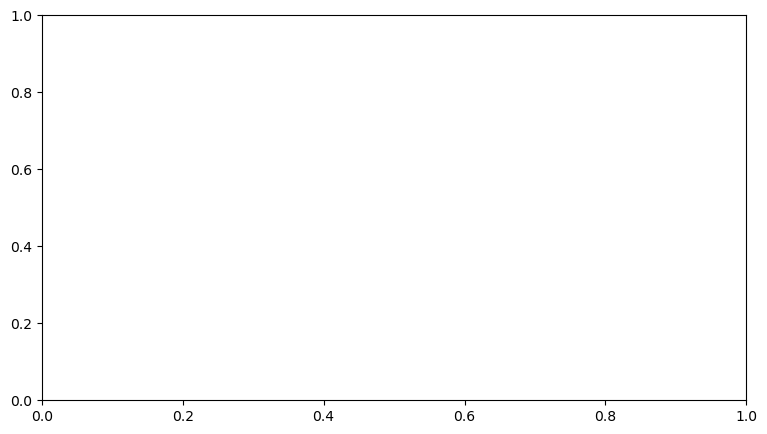

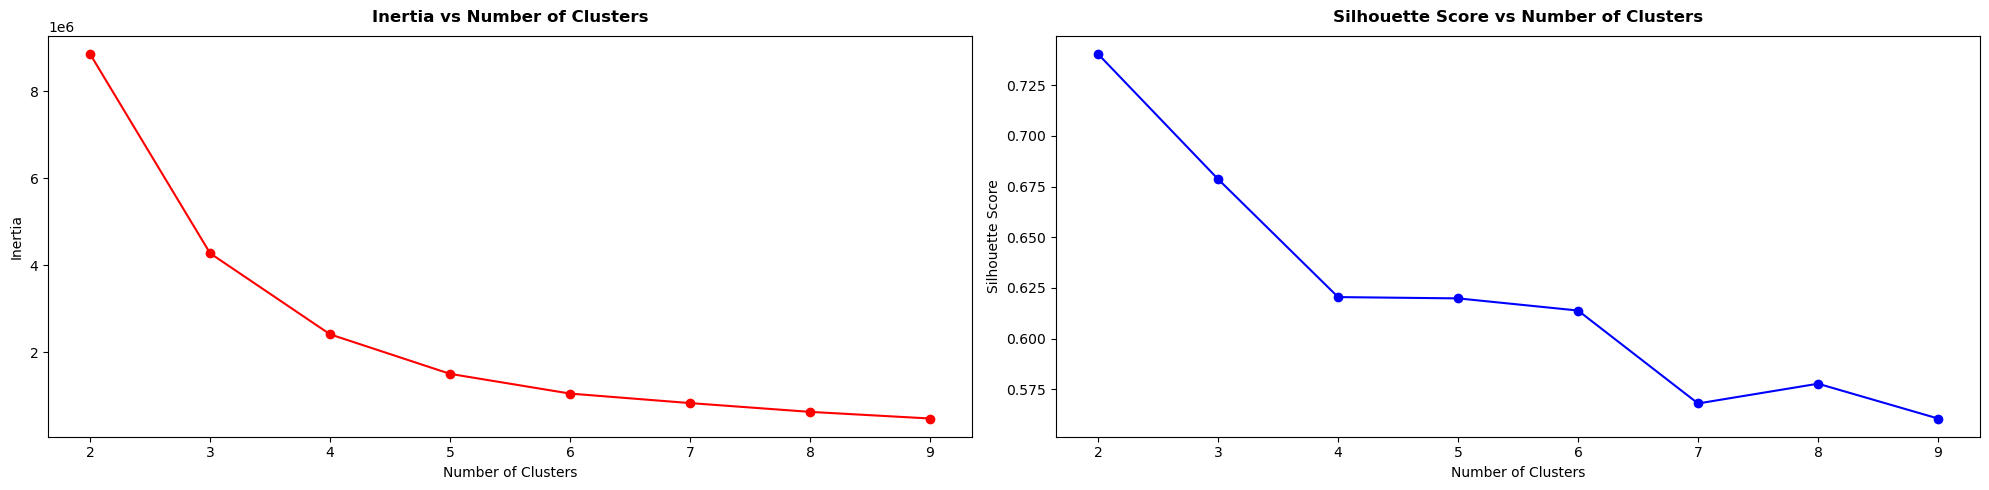

In [58]:
#create the parameters

cds_user_recency = cds_users[['Recency']]
k_clusters_recency = range(2, 10, 1)
inertia_values_recency = []
silhouette_score_recency = []

for k in k_clusters_recency:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(cds_user_recency)
    inertias = kmeans.inertia_
    inertia_values_recency.append(inertias)
    silhouette_score_recency.append(silhouette_score(cds_user_recency, kmeans.labels_))

    

cluster_determination(k_clusters_recency, inertia_values_recency, silhouette_score_recency)
    

In [59]:
kmeans = KMeans(n_clusters=4, max_iter=500, random_state=42)
kmeans.fit(cds_users[['Recency']])
cds_users['RecencyCluster'] = kmeans.predict(cds_users[['Recency']])
cds_users.head()

,CustomerID,Recency,RecencyCluster
0,17850.0,371,0
1,13047.0,31,1
2,12583.0,2,1
3,13748.0,95,3
4,15100.0,333,0


In [60]:
cds_users.groupby('RecencyCluster')['Recency'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,527.0,304.37,40.44,245.0,268.0,301.0,334.0,373.0
1,2118.0,18.12,13.23,0.0,7.0,16.0,28.0,48.0
2,613.0,185.38,32.04,132.0,157.0,184.0,212.0,244.0
3,1068.0,78.30,22.69,49.0,59.0,73.0,94.0,131.0


In [108]:
# Create function to reorder cluster numbers

def order_cluster(cluster_field_name, target_field_name, cds, ascending):
    """
    This function is used to reorder clusters.
    """
    new_cluster_field_name = 'new_' + cluster_field_name

    cds_new = cds.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    cds_new = cds_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    cds_new['Index'] = cds_new.index
    cds_final = pd.merge(cds, cds_new[[cluster_field_name, 'Index']], on=cluster_field_name)
    cds_final = cds_final.drop([cluster_field_name], axis=1)
    cds_final = cds_final.rename(columns={"Index":cluster_field_name})
    return cds_final


cds_users = order_cluster('RecencyCluster', 'Recency', cds_users, False)

In [64]:
cds_users.groupby('RecencyCluster')['Recency'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,527.0,304.37,40.44,245.0,268.0,301.0,334.0,373.0
1,613.0,185.38,32.04,132.0,157.0,184.0,212.0,244.0
2,1068.0,78.30,22.69,49.0,59.0,73.0,94.0,131.0
3,2118.0,18.12,13.23,0.0,7.0,16.0,28.0,48.0


#### Frequency Score

In [80]:
cds['Country'].head()
cds_users_frequency = cds.groupby('CustomerID')['InvoiceDate'].count().reset_index()
cds_users_frequency.columns = ['CustomerID', 'Frequency']
cds_users_frequency.head()

,CustomerID,Frequency
0,12347.0,182
1,12348.0,31
2,12349.0,72
3,12350.0,17
4,12352.0,83


In [83]:
cds_users = pd.merge(cds_users, cds_users_frequency, on='CustomerID')
cds_users.head()

#Accidentally ran merge twice duplicating Frequency column
#how do I drop one frequency column

,CustomerID,Recency,RecencyCluster,Frequency_x,Frequency_y
0,17850.0,371,0,297,297
1,13047.0,31,3,172,172
2,12583.0,2,3,247,247
3,13748.0,95,2,28,28
4,15100.0,333,0,3,3


In [87]:
#Dropping duplicate columns

cds_users = cds_users.T.drop_duplicates().T
cds_users.head()

,CustomerID,Recency,RecencyCluster,Frequency_x
0,17850.0,371.0,0.0,297.0
1,13047.0,31.0,3.0,172.0
2,12583.0,2.0,3.0,247.0
3,13748.0,95.0,2.0,28.0
4,15100.0,333.0,0.0,3.0


In [ ]:
#Renaming columns

cds_users = cds_users.rename(columns={'Frequency_x': 'Frequency'})
cds_users

In [89]:
inertia_values_frequency = []
silhouette_score_frequency = []
k_clusters__frequency = np.arange(2, 10, 1)

for k in k_clusters__frequency:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(cds_users[['Frequency']])
    inertia_values_frequency.append(kmeans.inertia_)
    silhouette_score_frequency.append(silhouette_score(cds_users[['Frequency']], kmeans.labels_))

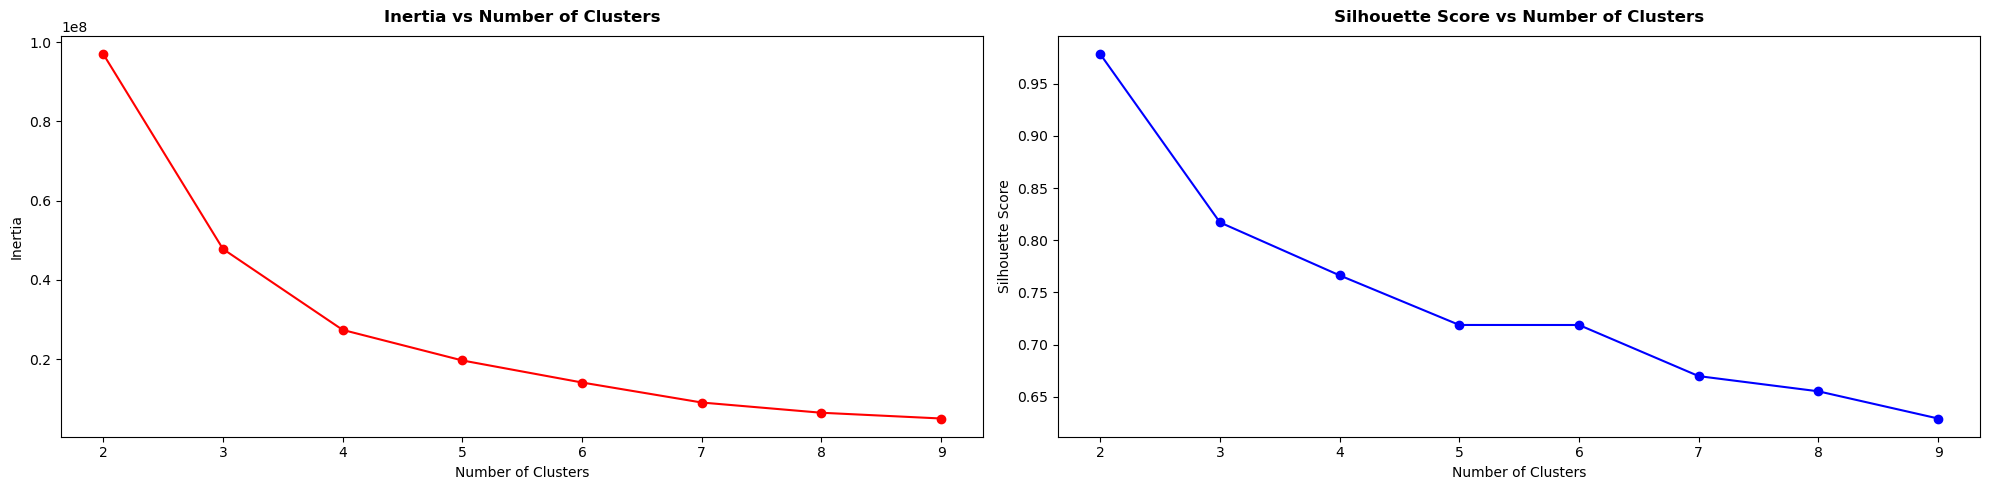

In [91]:
cluster_determination(k_clusters__frequency, inertia_values_frequency, silhouette_score_frequency)

##### Deciding the number of clusters based on the Silhouette Score

In [92]:
kmeans = KMeans(n_clusters=4, max_iter=500, random_state=42)
cds_users['FrequencyCluster'] = kmeans.fit_predict(cds_users[['Frequency']])
cds_users.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,17850.0,371.0,0.0,297.0,3
1,13047.0,31.0,3.0,172.0,0
2,12583.0,2.0,3.0,247.0,3
3,13748.0,95.0,2.0,28.0,0
4,15100.0,333.0,0.0,3.0,0


In [99]:
# Order the frequency cluster

cds_users = order_cluster('FrequencyCluster', 'Frequency', cds_users, True)
cds_users.groupby('FrequencyCluster')['Frequency'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3818.0,49.21,43.95,1.0,15.00,34.0,72.00,185.0
1,480.0,322.56,131.05,186.0,219.75,280.5,382.25,799.0
2,24.0,1323.29,494.39,851.0,971.50,1128.0,1535.50,2700.0
3,4.0,5803.75,1431.97,4594.0,4972.75,5387.0,6218.00,7847.0


#### Revenue Score

In [101]:
cds['Revenue'] = cds['Quantity'] * cds['UnitPrice']
cds_Revenue = cds.groupby('CustomerID')['Revenue'].sum().reset_index()
cds_Revenue.head()

,CustomerID,Revenue
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1457.55
3,12350.0,334.40
4,12352.0,1849.49


In [105]:
cds_users = pd.merge(cds_users, cds_Revenue, on='CustomerID')
cds_users.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,17850.0,371.0,0.0,297.0,1,5391.21
1,13047.0,31.0,3.0,172.0,0,3237.54
2,12583.0,2.0,3.0,247.0,1,7281.38
3,13748.0,95.0,2.0,28.0,0,948.25
4,15100.0,333.0,0.0,3.0,0,876.00


In [106]:
inertia_values_revenue = []
silhouette_score_revenue = []
k_clusters_revenue = np.arange(2, 10, 1)

for k in k_clusters_revenue:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(cds_users[['Revenue']])
    inertia_values_revenue.append(kmeans.inertia_)
    silhouette_score_revenue.append(silhouette_score(cds_users[['Revenue']], kmeans.labels_))

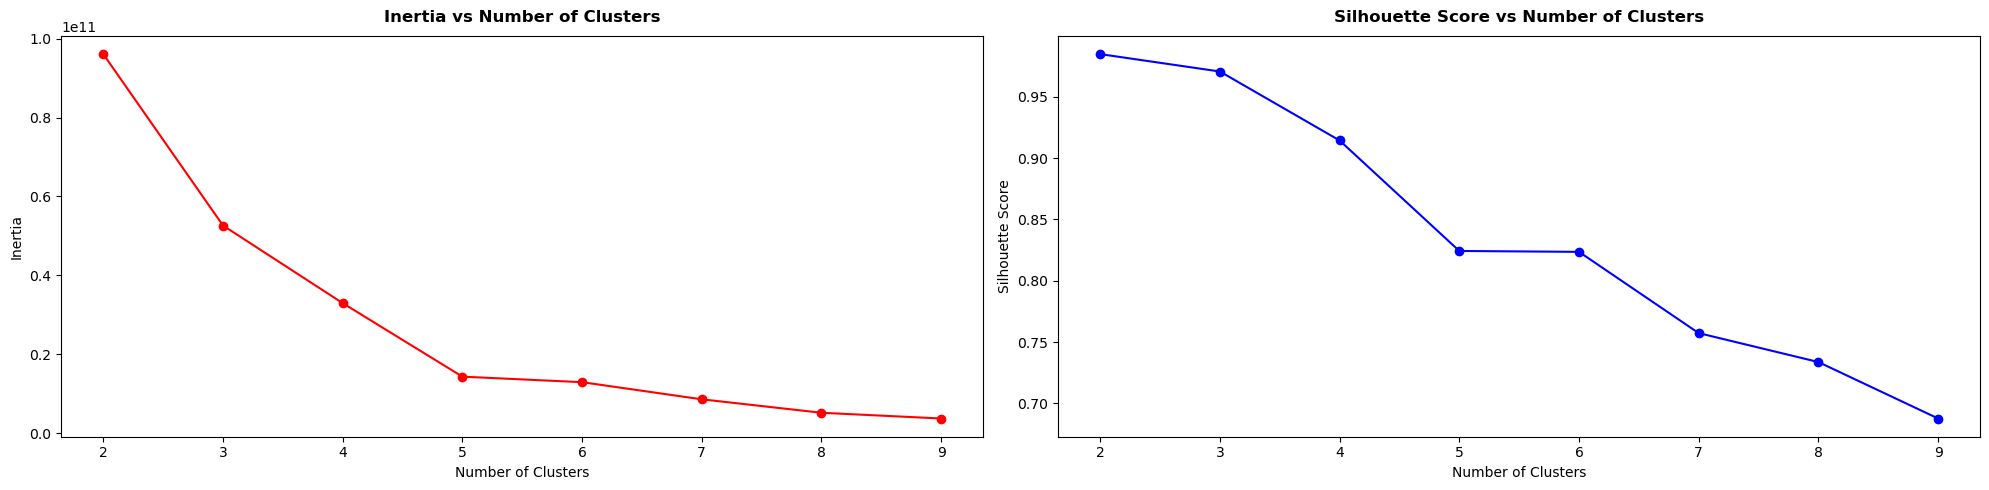

In [109]:
cluster_determination(k_clusters_revenue, inertia_values_revenue, silhouette_score_revenue)

In [110]:
# Revenue Cluster
kmeans = KMeans(n_clusters=4, max_iter=500, random_state=42)
cds_users['RevenueCluster'] = kmeans.fit_predict(cds_users[['Revenue']])
cds_users.head()

,CustomerID,Recency,Frequency,FrequencyCluster,Revenue,RecencyCluster,RevenueCluster
0,17850.0,371.0,297.0,1,5391.21,0,0
1,13047.0,31.0,172.0,0,3237.54,3,0
2,12583.0,2.0,247.0,1,7281.38,3,0
3,13748.0,95.0,28.0,0,948.25,2,0
4,15100.0,333.0,3.0,0,876.00,0,0


In [112]:
# Order the cluster numbers
cds_users = order_cluster('RevenueCluster', 'Revenue', cds_users, True)

#show details of the dataframe
cds_users.groupby('RevenueCluster')['Revenue'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,4251.0,1283.95,1676.30,2.90,302.52,654.67,1557.86,11581.80
1,63.0,22551.84,12042.38,11990.96,13544.96,17220.36,28818.28,54534.14
2,10.0,93544.28,36280.34,58825.83,62771.79,78721.97,120845.90,152206.35
3,2.0,259700.58,12997.87,250509.70,255105.14,259700.58,264296.02,268891.46


#### Overall Score based on RFM Clustering

In [118]:
cds_users['OverallScore'] = cds_users['RecencyCluster'] + cds_users['FrequencyCluster'] + cds_users['RevenueCluster']
cds_users.head()

,CustomerID,Recency,Frequency,FrequencyCluster,Revenue,RecencyCluster,RevenueCluster,OverallScore
0,17850.0,371.0,297.0,1,5391.21,0,0,1
1,13047.0,31.0,172.0,0,3237.54,3,0,3
2,12583.0,2.0,247.0,1,7281.38,3,0,4
3,13748.0,95.0,28.0,0,948.25,2,0,2
4,15100.0,333.0,3.0,0,876.00,0,0,0


In [119]:
cds_users.groupby('OverallScore')[['Recency', 'Frequency', 'Revenue']].mean().round(2)

,Recency,Frequency,Revenue
OverallScore,,,
0,304.25,22.81,381.54
1,186.12,33.34,608.26
2,78.95,46.65,947.93
3,21.25,70.54,1327.83
4,13.13,312.58,4883.50
5,6.98,591.30,16615.37
6,11.22,997.44,64349.75
7,2.12,3065.62,88094.68
8,0.50,3874.50,204671.09


#### Calculate the Customer Lifetime Value

In [121]:
cds_ltv_revenue = cds[cds['InvoiceDate']>=(cds.InvoiceDate.max()- pd.DateOffset(months=6))]

In [122]:
cds_ltv_revenue_per_user = cds_ltv_revenue.groupby('CustomerID')['Revenue'].sum().reset_index()
cds_ltv_revenue_per_user.columns = ['CustomerID', 'Last6Months_Revenue']
cds_ltv_revenue_per_user.head()

,CustomerID,Last6Months_Revenue
0,12347.0,2486.57
1,12348.0,310.00
2,12349.0,1457.55
3,12352.0,944.23
4,12356.0,58.35


In [123]:
cds_users = pd.merge(cds_users, cds_ltv_revenue_per_user, on='CustomerID', how='left')
cds_users

,CustomerID,Recency,Frequency,FrequencyCluster,Revenue,RecencyCluster,RevenueCluster,OverallScore,Last6Months_Revenue
0,17850.0,371.0,297.0,1,5391.21,0,0,1,NaN
1,13047.0,31.0,172.0,0,3237.54,3,0,3,1565.86
2,12583.0,2.0,247.0,1,7281.38,3,0,4,4238.99
3,13748.0,95.0,28.0,0,948.25,2,0,2,367.40
4,15100.0,333.0,3.0,0,876.00,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...
4321,13436.0,1.0,12.0,0,196.89,3,0,3,196.89
4322,15520.0,1.0,18.0,0,343.50,3,0,3,343.50
4323,13298.0,0.0,2.0,0,360.00,3,0,3,360.00
4324,14569.0,0.0,12.0,0,227.39,3,0,3,227.39


In [124]:
cds_users.fillna(0, inplace=True)
cds_users.isnull().sum()

CustomerID             0
Recency                0
Frequency              0
FrequencyCluster       0
Revenue                0
RecencyCluster         0
RevenueCluster         0
OverallScore           0
Last6Months_Revenue    0
dtype: int64

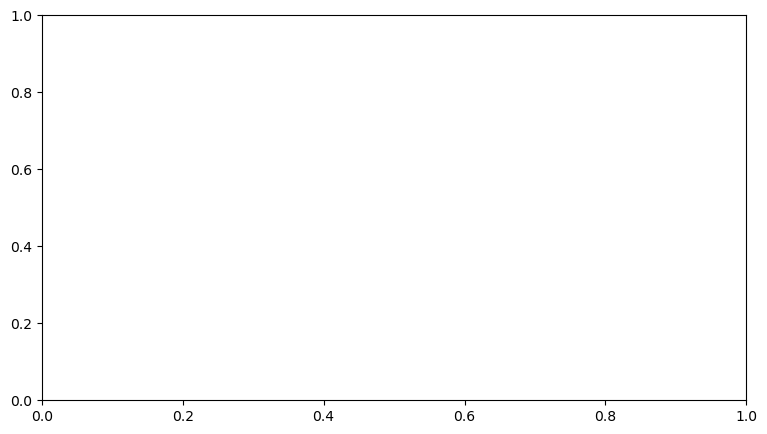

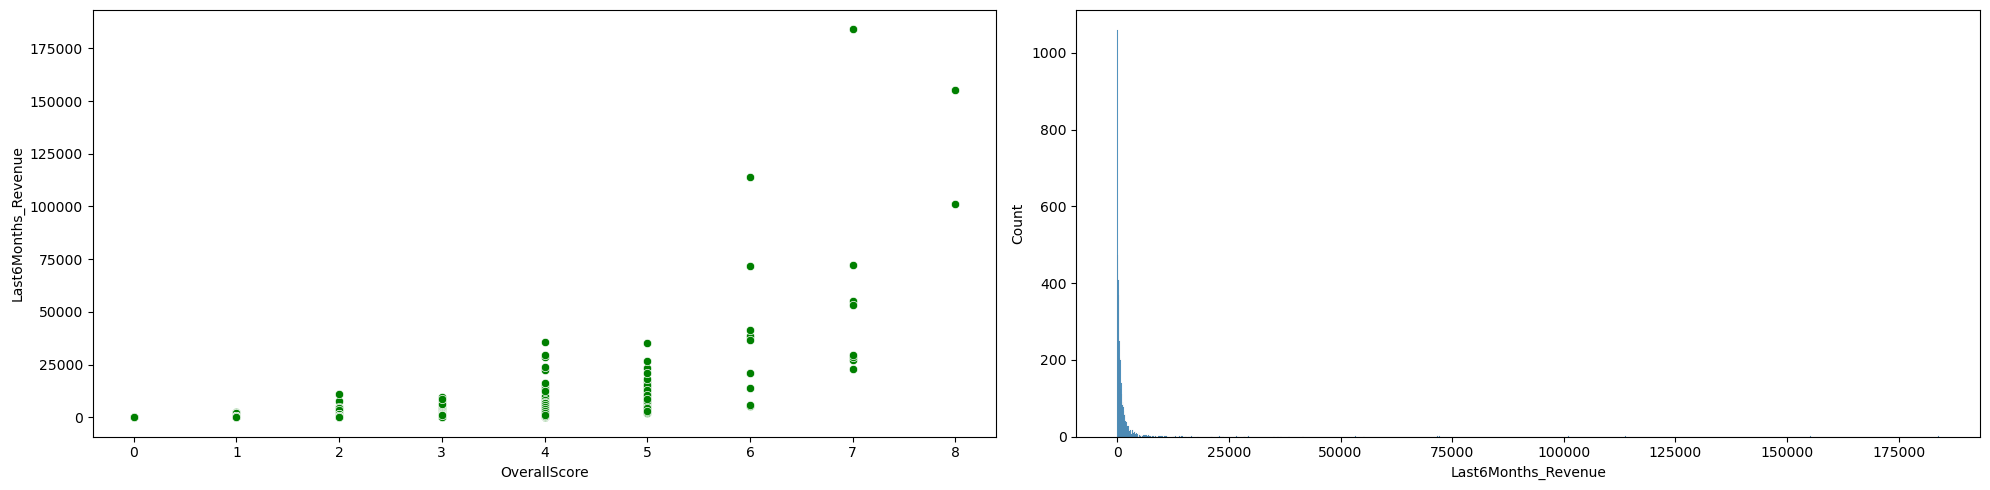

In [126]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data= cds_users, x= 'OverallScore', y= 'Last6Months_Revenue', color='green')
plt.subplot(1, 2, 2)
sns.histplot(data= cds_users, x='Last6Months_Revenue')
plt.tight_layout()
plt.show()

In [128]:
kmeans = KMeans(n_clusters = 3, random_state=42)
cds_users['LTVCluster'] = kmeans.fit_predict(cds_users[['Last6Months_Revenue']])
cds_users.head()

,CustomerID,Recency,Frequency,FrequencyCluster,Revenue,RecencyCluster,RevenueCluster,OverallScore,Last6Months_Revenue,LTVCluster
0,17850.0,371.0,297.0,1,5391.21,0,0,1,0.00,0
1,13047.0,31.0,172.0,0,3237.54,3,0,3,1565.86,0
2,12583.0,2.0,247.0,1,7281.38,3,0,4,4238.99,0
3,13748.0,95.0,28.0,0,948.25,2,0,2,367.40,0
4,15100.0,333.0,3.0,0,876.00,0,0,0,0.00,0


In [129]:
#Order Cluster number based on LTV

cds_users = order_cluster('LTVCluster', 'Last6Months_Revenue', cds_users, True)

cds_clusters = cds_users.copy()

In [131]:
#See details of the clusters

cds_clusters.groupby('LTVCluster')['Last6Months_Revenue'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,4300.0,866.26,1456.03,0.00,115.12,396.95,1012.19,16612.13
1,22.0,34649.39,15508.79,18053.20,23351.19,28979.22,37976.54,72111.08
2,4.0,138529.30,38142.16,101081.65,110593.06,134509.94,162446.17,184015.67


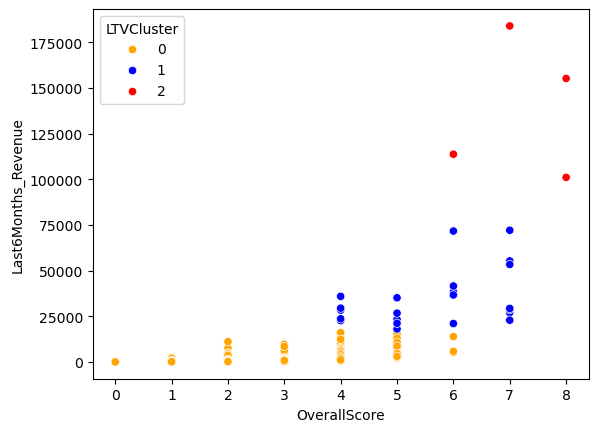

In [138]:
sns.scatterplot(data=cds_clusters, x = 'OverallScore', y = 'Last6Months_Revenue', hue='LTVCluster',
               palette=['Orange', 'Blue', 'Red'])
plt.show()

### EDA for Classification Model

In [140]:
cds_users.head()

,CustomerID,Recency,Frequency,FrequencyCluster,Revenue,RecencyCluster,RevenueCluster,OverallScore,Last6Months_Revenue,LTVCluster
0,17850.0,371.0,297.0,1,5391.21,0,0,1,0.00,0
1,13047.0,31.0,172.0,0,3237.54,3,0,3,1565.86,0
2,12583.0,2.0,247.0,1,7281.38,3,0,4,4238.99,0
3,13748.0,95.0,28.0,0,948.25,2,0,2,367.40,0
4,15100.0,333.0,3.0,0,876.00,0,0,0,0.00,0


##### Understanding the Target variable

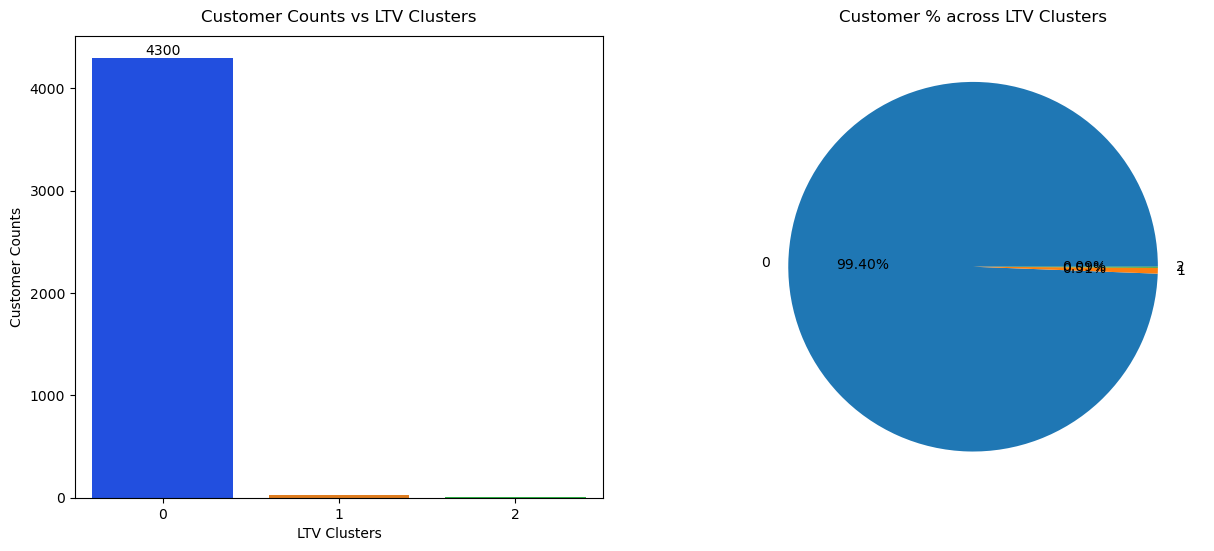

In [143]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
ax = sns.countplot(data=cds_users, x = 'LTVCluster', palette='bright')
plt.xlabel('LTV Clusters')
plt.ylabel('Customer Counts')
plt.title('Customer Counts vs LTV Clusters', pad=10)
plt.bar_label(ax.containers[0])

plt.subplot(1, 2, 2)
value_counts = cds_users['LTVCluster'].value_counts()
plt.pie(value_counts, labels = value_counts.index,
       autopct = "%.2f%%"
       )
plt.title('Customer % across LTV Clusters', pad=10)
plt.show()

In [144]:
x_users = cds_users.drop(columns = ['LTVCluster'])
y_users = cds_users[['LTVCluster']]
Counter(y_users)

Counter({'LTVCluster': 1})

In [146]:
# Perform  Synthetic Minority Over-sampling Technique (SMOTE)

smote = SMOTE(random_state=42, k_neighbors=3)

x_resampled, y_resampled = smote.fit_resample(x_users, y_users)

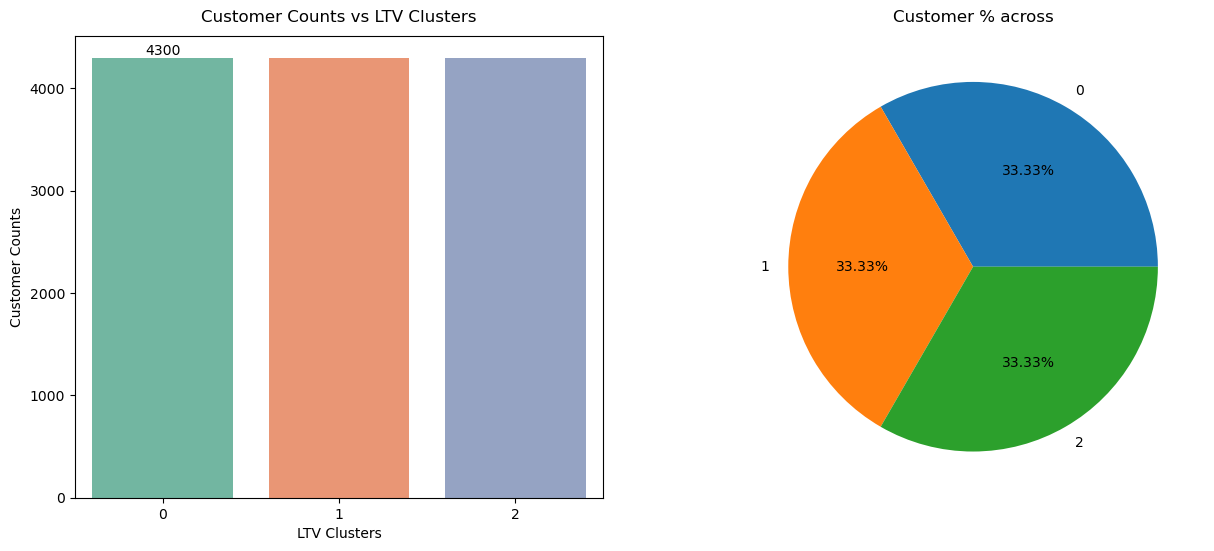

In [150]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
ax = sns.countplot(data=y_resampled, x = 'LTVCluster', palette='Set2')
plt.xlabel('LTV Clusters')
plt.ylabel('Customer Counts')
plt.title('Customer Counts vs LTV Clusters', pad=10)
plt.bar_label(ax.containers[0])

plt.subplot(1, 2, 2)
value_counts = y_resampled['LTVCluster'].value_counts()
plt.pie(value_counts, 
       labels = value_counts.index,
       autopct = "%.2f%%"
       )
plt.title('Customer % across', pad=10)
plt.show()

### Feature Engineering

In [153]:
# Remove the CustomerID column and standardize the remaining data
x_resampled.drop(columns = 'CustomerID', inplace=True)

scaler = StandardScaler()

x_resampled_scale = scaler.fit_transform(x_resampled)

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled_scale, y_resampled.values,
                                                   random_state=42, test_size=0.2, stratify=
                                                   y_resampled.values)

In [156]:
# Print the shape of the splits
print(f"Train features shape: {x_train.shape}")
print(f"Train features shape: {x_test.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Train labels shape: {y_test.shape}")

Train features shape: (10320, 8)
Train features shape: (2580, 8)
Train labels shape: (10320, 1)
Train labels shape: (2580, 1)


### Model Building 

In [157]:
# Define evaluation function

def error_metrics(y_train, y_train_pred, y_test, y_test_pred):

    """Defines an evaluation for training data errors"""

    errors = {}

    errors['train_accuracy_score'] = accuracy_score(y_train, y_train_pred)

    errors['test_accuracy_score'] = accuracy_score(y_test, y_test_pred)


    return errors

#### Logistic Regression

In [159]:
lr = LogisticRegression(solver='lbfgs', penalty='l2', random_state=42, max_iter=300)
lr.fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
y_test_probs = lr.predict_proba(x_test)[:, 1]

error_lr = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_lr['Model'] = 'Logistic Regression'
error_lr

{'train_accuracy_score': 0.9974806201550388,
 'test_accuracy_score': 0.9984496124031008,
 'Model': 'Logistic Regression'}


Logistic Regression Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       860
           2       1.00      1.00      1.00       860

    accuracy                           1.00      2580
   macro avg       1.00      1.00      1.00      2580
weighted avg       1.00      1.00      1.00      2580


Logistic Regression Confusion Matrix:

[[856   4   0]
 [  0 860   0]
 [  0   0 860]]


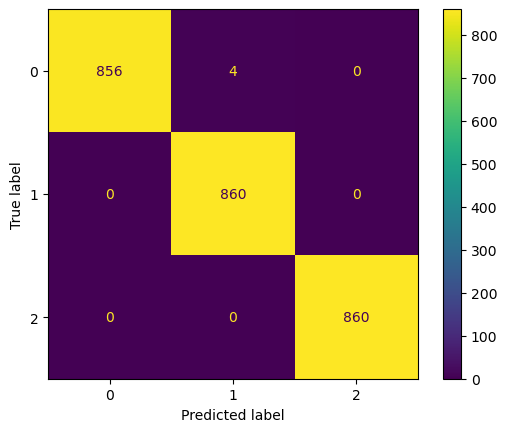

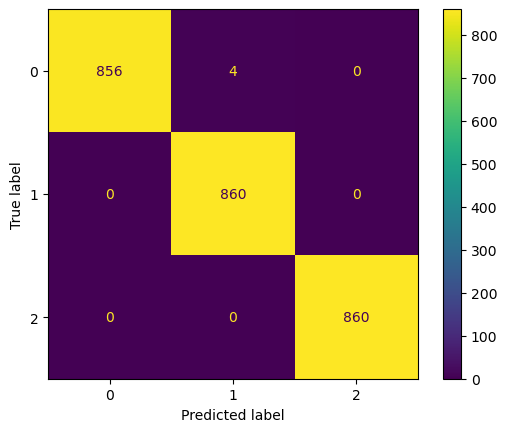

In [161]:
class_report = classification_report(y_test, y_test_pred)
print('\nLogistic Regression Confusion Matrix:\n')
print(class_report)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print('\nLogistic Regression Confusion Matrix:\n')
print(conf_matrix)

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

#### Random Forest

In [163]:
rf = RandomForestClassifier(criterion= 'entropy', max_depth=10, max_features='sqrt', 
                            random_state=42)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
y_test_probs = rf.predict_proba(x_test)[:, 1]

error_rf = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_rf['Model'] = 'Random Forest'
error_rf

{'train_accuracy_score': 1.0,
 'test_accuracy_score': 1.0,
 'Model': 'Random Forest'}


Random Forest Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       860
           2       1.00      1.00      1.00       860

    accuracy                           1.00      2580
   macro avg       1.00      1.00      1.00      2580
weighted avg       1.00      1.00      1.00      2580


Random Forest Confusion Matrix

[[860   0   0]
 [  0 860   0]
 [  0   0 860]]


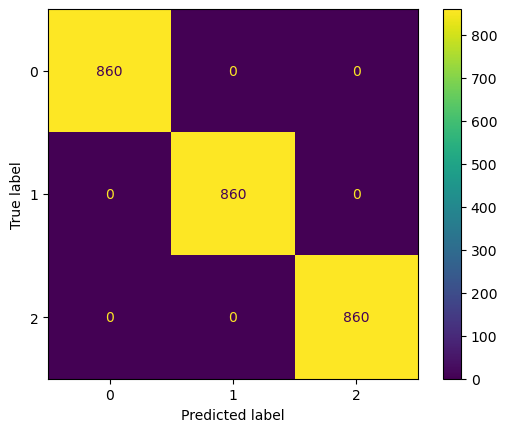

In [165]:
class_report = classification_report(y_test, y_test_pred)
print('\nRandom Forest Classification Report\n')
print(class_report)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print('\nRandom Forest Confusion Matrix\n')
print(conf_matrix)


disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()